# TDAチュートリアル2：パーシステンス図のベクトル化
このノートではパーシステンス図のベクトル化をGUDHIでどのように行うかを説明する．

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi
import gudhi.representations
%matplotlib inline

## データ生成とパーシステンス図の計算
まず考えるおもちゃのデータを生成しよう．ここでは円周が二つ交わっているものを考えよう．

In [2]:
def generate_random_circle(num_pts):
    X = np.random.randn(num_pts, 2)
    norms = np.linalg.norm(X, axis=1)
    pts = X / norms.reshape(num_pts, -1)
    return pts

def generate_random_two_circles(num_pts):
    n = num_pts // 2
    X_circle0 = generate_random_circle(num_pts)
    X_circle1 = generate_random_circle(num_pts) + np.vstack([np.ones(num_pts), np.zeros(num_pts)]).T
    X = np.vstack([X_circle0, X_circle1])
    return X

In [3]:
num_pts = 200
X0 = generate_random_two_circles(num_pts)

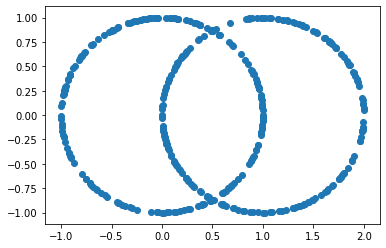

In [4]:
plt.scatter(X0[:,0], X0[:,1])
plt.show()

このデータからチュートリアル1で説明したやり方でパーシステンス図を計算する．

In [5]:
rips0 = gudhi.RipsComplex(X0)
st0 = rips0.create_simplex_tree(2)
diag0 = st0.persistence()

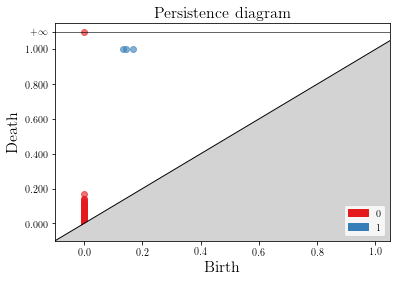

In [6]:
gudhi.plot_persistence_diagram(diag0, legend=True)

パーシステンス図からも3つのループ（1次の点）があることが見て取れる．点群をもう一つ生成しておこう．

In [7]:
X1 = generate_random_two_circles(num_pts)
rips1 = gudhi.RipsComplex(X1)
st1 = rips1.create_simplex_tree(2)
diag1 = st1.persistence()

## 様々なベクトル化手法のやり方
ここでは典型的なパーシステンス図のベクトル化をGUDHIを使ってどのように行うかを説明する．

GUDHIのパーシステンス図はそのままではタプルのリストとして表現されていたことを思い出そう．

In [8]:
diag0

[(1, (0.13396790999417146, 1.0000445890428686)),
 (1, (0.14228033103801394, 1.0001451511310333)),
 (1, (0.16734354990399444, 1.000036453667623)),
 (0, (0.0, inf)),
 (0, (0.0, 0.1669015704457083)),
 (0, (0.0, 0.14138666797100577)),
 (0, (0.0, 0.13920405452540002)),
 (0, (0.0, 0.12950732323079514)),
 (0, (0.0, 0.12333883577315975)),
 (0, (0.0, 0.11891507775321672)),
 (0, (0.0, 0.11802597071012053)),
 (0, (0.0, 0.11576886216088215)),
 (0, (0.0, 0.11259365392905708)),
 (0, (0.0, 0.10774472830785853)),
 (0, (0.0, 0.10766225127489973)),
 (0, (0.0, 0.10736760370131447)),
 (0, (0.0, 0.09555347054265563)),
 (0, (0.0, 0.09157832072258802)),
 (0, (0.0, 0.0892206382154691)),
 (0, (0.0, 0.0880205528697995)),
 (0, (0.0, 0.08696324604750584)),
 (0, (0.0, 0.085400723260825)),
 (0, (0.0, 0.08513354177752436)),
 (0, (0.0, 0.08490394207435113)),
 (0, (0.0, 0.08179486373187106)),
 (0, (0.0, 0.08017826712169573)),
 (0, (0.0, 0.07999889432387569)),
 (0, (0.0, 0.07960544695141253)),
 (0, (0.0, 0.079387686544

GUDHIにおけるパーシステンス図のベクトル化を使うには次元ごとにnx2のnumpy配列で持っていた方が使いやすい．これはクラス`SimplexTree`のメソッド`persistence_intervals_in_dimension`で引数として次元を与えることで得られる．

In [9]:
diag0_0_naive = st0.persistence_intervals_in_dimension(0)
diag0_1 = st0.persistence_intervals_in_dimension(1)

In [10]:
diag0_0_naive

array([[0.00000000e+00, 3.89994238e-06],
       [0.00000000e+00, 4.23647013e-06],
       [0.00000000e+00, 2.03028370e-05],
       [0.00000000e+00, 1.86272913e-04],
       [0.00000000e+00, 2.91460232e-04],
       [0.00000000e+00, 3.56891063e-04],
       [0.00000000e+00, 4.81890818e-04],
       [0.00000000e+00, 5.91249915e-04],
       [0.00000000e+00, 7.37295783e-04],
       [0.00000000e+00, 7.67885647e-04],
       [0.00000000e+00, 8.48910306e-04],
       [0.00000000e+00, 8.51557928e-04],
       [0.00000000e+00, 8.68368031e-04],
       [0.00000000e+00, 9.50380376e-04],
       [0.00000000e+00, 1.01341190e-03],
       [0.00000000e+00, 1.35180695e-03],
       [0.00000000e+00, 1.54108574e-03],
       [0.00000000e+00, 1.57014203e-03],
       [0.00000000e+00, 1.69023110e-03],
       [0.00000000e+00, 1.79164417e-03],
       [0.00000000e+00, 1.91320089e-03],
       [0.00000000e+00, 1.99143840e-03],
       [0.00000000e+00, 2.00215444e-03],
       [0.00000000e+00, 2.04951701e-03],
       [0.000000

In [11]:
diag0_1

array([[0.16734355, 1.00003645],
       [0.13396791, 1.00004459],
       [0.14228033, 1.00014515]])

ここで一つ注意点がある．0次のパーシステンス図には最後まで消えない連結成分に対応する`(0,inf)`の点が（通常のやり方だと）一つ存在するが，これがあるとGUDHIのベクトル化においてエラーを引き起こす．ここではこの問題に対処するためnumpy配列の最後に現れるこの点を除いた0次のパーシステンス図を考えることにしよう．

In [12]:
diag0_0 = diag0_0_naive[:-1,:]

もう一つの点群についても同じ操作をして，あとのベクトル化のために次元ごとにnumpy配列表示のリストを作っておく．

In [13]:
diag1_0 = st1.persistence_intervals_in_dimension(0)[:-1,:]
diag1_1 = st1.persistence_intervals_in_dimension(1)

In [14]:
list_diags_0 = [diag0_0, diag1_0]
list_diags_1 = [diag0_1, diag1_1]

### ベッチ曲線
まず初めにベッチ曲線でのベクトル化をしてみよう．これにはクラス`BettiCurve`を曲線の長さを引数に与えて使えば良い．GUDHIはインターフェイスとしてscikit-learnと同様のものを備えており，ベッチ曲線を始めとするベクトル化手法をデータに適合させるにはメソッド`fit`を用いればよい．

In [15]:
Betti0 = gudhi.representations.vector_methods.BettiCurve(resolution=20)
Betti1 = gudhi.representations.vector_methods.BettiCurve(resolution=20)

In [16]:
Betti0.fit(list_diags_0)
Betti1.fit(list_diags_1)

BettiCurve(resolution=20, sample_range=array([0.1234871 , 1.00203952]))

ベクトル化の出力は以下のように1次元のnumpy配列である．

In [17]:
Betti0(diag0_0)

array([399., 306., 231., 176., 134., 100.,  68.,  52.,  34.,  25.,  16.,
        12.,  12.,   8.,   5.,   3.,   2.,   1.,   1.,   0.])

In [18]:
Betti1(diag0_1)

array([0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 0.])

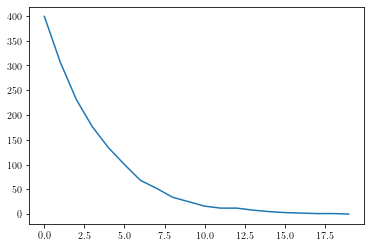

In [19]:
plt.plot(Betti0(diag0_0))
plt.show()

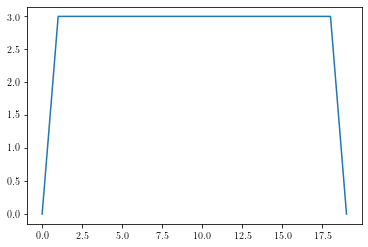

In [20]:
plt.plot(Betti1(diag0_1))
plt.show()

### パーシステンスイメージ
次にパーシステンスイメージによるベクトル化を試してみよう．これにはクラス`PersistenceImage`を使う．

In [21]:
PI0 = gudhi.representations.vector_methods.PersistenceImage(resolution=[20,20])
PI1 = gudhi.representations.vector_methods.PersistenceImage(resolution=[20,20])

In [22]:
PI0.fit(list_diags_0)
PI1.fit(list_diags_1)

PersistenceImage(bandwidth=1.0,
                 im_range=array([0.1234871 , 0.37258984, 0.62944968, 0.87695473]),
                 resolution=[20, 20],
                 weight=<function PersistenceImage.<lambda> at 0x7f7906ee8f70>)

パーシステンスイメージによるベクトル化の出力はnumpy配列である．2次元配列にするには`reshape`する必要がある．

In [23]:
PI0(diag0_0)

array([63.44942075, 63.44942075, 63.44942075, 63.44942075, 63.44942075,
       63.44942075, 63.44942075, 63.44942075, 63.44942075, 63.44942075,
       63.44942075, 63.44942075, 63.44942075, 63.44942075, 63.44942075,
       63.44942075, 63.44942075, 63.44942075, 63.44942075, 63.44942075,
       63.46385089, 63.46385089, 63.46385089, 63.46385089, 63.46385089,
       63.46385089, 63.46385089, 63.46385089, 63.46385089, 63.46385089,
       63.46385089, 63.46385089, 63.46385089, 63.46385089, 63.46385089,
       63.46385089, 63.46385089, 63.46385089, 63.46385089, 63.46385089,
       63.47339025, 63.47339025, 63.47339025, 63.47339025, 63.47339025,
       63.47339025, 63.47339025, 63.47339025, 63.47339025, 63.47339025,
       63.47339025, 63.47339025, 63.47339025, 63.47339025, 63.47339025,
       63.47339025, 63.47339025, 63.47339025, 63.47339025, 63.47339025,
       63.47803661, 63.47803661, 63.47803661, 63.47803661, 63.47803661,
       63.47803661, 63.47803661, 63.47803661, 63.47803661, 63.47

In [24]:
PI1(diag0_1)

array([0.46553355, 0.46564258, 0.4656716 , 0.4656206 , 0.46548959,
       0.46527866, 0.4649879 , 0.46461748, 0.46416757, 0.46363841,
       0.46303027, 0.46234347, 0.46157836, 0.46073532, 0.4598148 ,
       0.45881726, 0.45774321, 0.4565932 , 0.45536782, 0.45406768,
       0.46684657, 0.46695589, 0.46698498, 0.46693381, 0.46680243,
       0.46659088, 0.46629929, 0.4659278 , 0.46547661, 0.46494594,
       0.46433607, 0.46364732, 0.46288003, 0.4620346 , 0.46111147,
       0.4601111 , 0.45903401, 0.45788074, 0.45665188, 0.45534807,
       0.46808388, 0.46819347, 0.46822262, 0.4681713 , 0.46803955,
       0.46782743, 0.46753504, 0.46716256, 0.46671015, 0.46617806,
       0.46556656, 0.46487597, 0.46410663, 0.46325895, 0.46233335,
       0.46133031, 0.46025035, 0.45909401, 0.45786188, 0.45655459,
       0.46924484, 0.46935469, 0.46938389, 0.46933243, 0.46920034,
       0.46898767, 0.46869455, 0.46832112, 0.46786758, 0.46733415,
       0.46672112, 0.4660288 , 0.46525754, 0.46440773, 0.46347

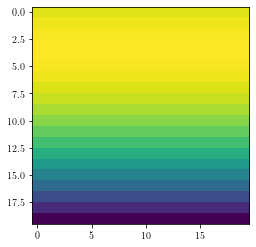

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(PI0(diag0_0).reshape(20,20))
plt.show()

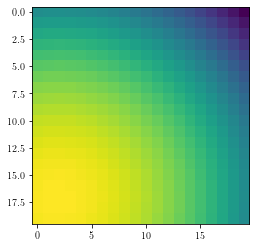

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(PI1(diag0_1).reshape(20,20))
plt.show()

### パーシステンスランドスケープ
ここでは最後にパーシステンスランドスケープによるベクトル化を説明しよう．クラス`Landscape`を用いて行う．引数としてはランドスケープ関数の個数と解像度を指定する．

In [27]:
resolution = 100
PL0 = gudhi.representations.vector_methods.Landscape(num_landscapes=5, resolution=resolution)
PL1 = gudhi.representations.vector_methods.Landscape(num_landscapes=5, resolution=resolution)

In [28]:
PL0.fit(list_diags_0)
PL1.fit(list_diags_1)

Landscape(num_landscapes=5, resolution=100,
          sample_range=array([0.1234871 , 1.00203952]))

ベクトル化の出力はやはりnumpy配列である．`resolution`の長さごとに各ランドスケープ関数が保持されている．

In [29]:
PL0(diag0_0)

array([0.00233697, 0.00467395, 0.00701092, 0.0093479 , 0.01168487,
       0.01402185, 0.01635882, 0.0186958 , 0.02103277, 0.02336975,
       0.02570672, 0.0280437 , 0.03038067, 0.03271765, 0.03505462,
       0.0373916 , 0.03972857, 0.04206555, 0.04440252, 0.0467395 ,
       0.04907647, 0.05141345, 0.05375042, 0.0560874 , 0.05842437,
       0.06076135, 0.06309832, 0.0654353 , 0.06777227, 0.07010925,
       0.07244622, 0.0747832 , 0.07712017, 0.07945715, 0.08179412,
       0.0841311 , 0.08646807, 0.08880505, 0.09114202, 0.093479  ,
       0.09581597, 0.09815295, 0.10048992, 0.1028269 , 0.10516387,
       0.10750085, 0.10983782, 0.1121748 , 0.11451177, 0.11684874,
       0.11684874, 0.11451177, 0.1121748 , 0.10983782, 0.10750085,
       0.10516387, 0.1028269 , 0.10048992, 0.09815295, 0.09581597,
       0.093479  , 0.09114202, 0.08880505, 0.08646807, 0.0841311 ,
       0.08179412, 0.07945715, 0.07712017, 0.0747832 , 0.07244622,
       0.07010925, 0.06777227, 0.0654353 , 0.06309832, 0.06076

In [30]:
PL1(diag0_1)

array([1.21283129e-02, 2.42566258e-02, 3.63849387e-02, 4.85132516e-02,
       6.06415644e-02, 7.27698773e-02, 8.48981902e-02, 9.70265031e-02,
       1.09154816e-01, 1.21283129e-01, 1.33411442e-01, 1.45539755e-01,
       1.57668068e-01, 1.69796380e-01, 1.81924693e-01, 1.94053006e-01,
       2.06181319e-01, 2.18309632e-01, 2.30437945e-01, 2.42566258e-01,
       2.54694571e-01, 2.66822884e-01, 2.78951196e-01, 2.91079509e-01,
       3.03207822e-01, 3.15336135e-01, 3.27464448e-01, 3.39592761e-01,
       3.51721074e-01, 3.63849387e-01, 3.75977700e-01, 3.88106012e-01,
       4.00234325e-01, 4.12362638e-01, 4.24490951e-01, 4.36619264e-01,
       4.48747577e-01, 4.60875890e-01, 4.73004203e-01, 4.85132516e-01,
       4.97260828e-01, 5.09389141e-01, 5.21517454e-01, 5.33645767e-01,
       5.45774080e-01, 5.57902393e-01, 5.70030706e-01, 5.82159019e-01,
       5.94287332e-01, 6.06415644e-01, 6.06415644e-01, 5.94287332e-01,
       5.82159019e-01, 5.70030706e-01, 5.57902393e-01, 5.45774080e-01,
      

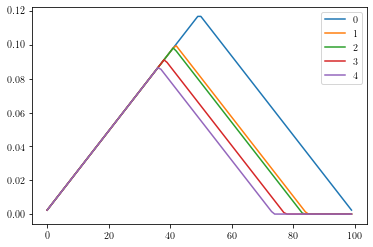

In [31]:
for ind in range(5):
    plt.plot(PL0(diag0_0)[ind*resolution:(ind+1)*resolution], label=ind)
plt.legend()
plt.show()

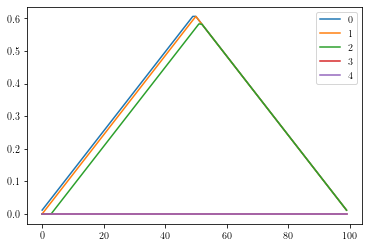

In [32]:
for ind in range(5):
    plt.plot(PL1(diag0_1)[ind*resolution:(ind+1)*resolution], label=ind)
plt.legend()
plt.show()

TDAを用いたパーシステンス図への変換とこれらのベクトル化を使って機械学習に入力しやすいトポロジー的特徴量を取り出すことができた．次はこれを用いてscikit-learnとどのように組み合わせるかを簡単に説明する．